Visualizer
======
Histograms for the training data

First import everything




In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
print(df.head(3))

price = df['SalePrice']

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  

[3 rows x 81 columns]


## SalePrice
Check whether the saleprice is normally distributed.

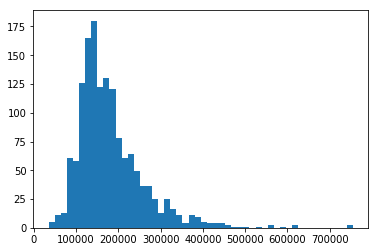

In [3]:
plt.hist(price, bins=50)
plt.show()

The Houseprice seems normally distributed. However, there are some outlier that we might discard that have a value greater than 500k. The total count of these occurences are:

In [4]:
len(df[price>500000])

9

## LotFrontage
Replace all the nans with value of '0' to make sure they are outside of the spectrum

_(there were no 0 values observed)_

In [73]:
x_nan = df[df['LotFrontage'].isna()]
x_nan['LotFrontage'] = x_nan['LotFrontage'].fillna(0)
price_nan = x_nan['SalePrice']

x_nan

c:\users\ruben\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,0.0,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,0.0,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,0.0,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,0.0,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,0.0,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
31,32,20,RL,0.0,8544,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal,149350
42,43,85,RL,0.0,9180,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal,144000
43,44,20,RL,0.0,9200,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,130250
50,51,60,RL,0.0,13869,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,177000
64,65,60,RL,0.0,9375,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,2,2009,WD,Normal,219500


c:\users\ruben\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


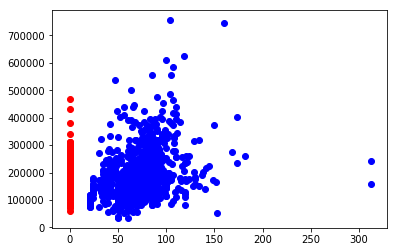

In [86]:
x_nan = df[df['LotFrontage'].isna()]
x_nan['LotFrontage'] = x_nan['LotFrontage'].fillna(0)
lot_nan = x_nan['LotFrontage']
price_nan = x_nan['SalePrice']

temp = df['LotFrontage'].dropna()
dfnew = df.iloc[temp.index.values]
price_x = dfnew['SalePrice']


plt.scatter(temp, price_x, c='b', label='Normal')
plt.scatter(lot_nan,price_nan, c='r', label='NaN')
plt.show()

Two outliers are being observed, where the LotFrontage is greater than 300.
These correspond to the rows:

In [24]:
df[df['LotFrontage'] > 300]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


Also, two possible outliers where the houseprice is greater than 700k:

In [7]:
df[price>700000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


## SalePrice Trend

We now investigate the trend of the sale price over the date.


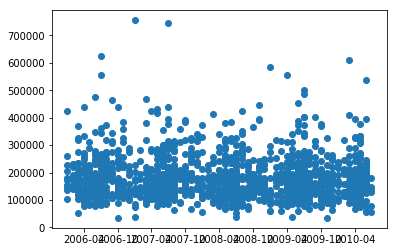

In [138]:
date = pd.to_datetime({'year': df['YrSold'], 'month': df['MoSold'], 'day': 1})
df = df.assign(date=date).drop('YrSold', 1)

dates = []
for time in date:
    dates.append(pd.Timestamp(time).to_pydatetime())

    

plt.plot_date(dates, price)

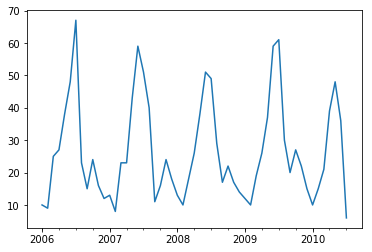

In [132]:
df.groupby(date).count()['SalePrice'].plot()

Average house price per month

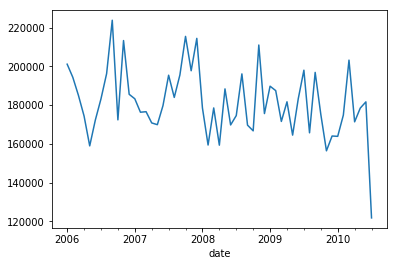

In [151]:
df.groupby(pd.Grouper(key='date', freq='M')).mean()['SalePrice'].plot()